#**Libraries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import shutil
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

#**Data Loading**

In [2]:
!wget "https://archive.ics.uci.edu/static/public/222/bank+marketing.zip"

--2023-10-03 03:31:36--  https://archive.ics.uci.edu/static/public/222/bank+marketing.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank+marketing.zip’

bank+marketing.zip      [  <=>               ] 999.85K  2.57MB/s    in 0.4s    

2023-10-03 03:31:37 (2.57 MB/s) - ‘bank+marketing.zip’ saved [1023843]



In [3]:
!unzip "/content/bank+marketing.zip"

Archive:  /content/bank+marketing.zip
 extracting: bank.zip                
 extracting: bank-additional.zip     


In [4]:
!unzip "/content/bank-additional.zip"

Archive:  /content/bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  inflating: __MACOSX/._bank-additional  


In [5]:
# Path to the directory containing the files
directory_path = "/content/bank-additional"

# Get a list of files in the directory
files = os.listdir(directory_path)

# Move each file to the parent directory
for file in files:
    # Construct the source and destination paths
    source = os.path.join(directory_path, file)
    destination = os.path.join(os.path.dirname(directory_path), file)

    # Move the file
    shutil.move(source, destination)

# Remove the empty directory
os.rmdir(directory_path)

print("Files moved successfully.")

Files moved successfully.


In [6]:
# Making dataframe
df = pd.read_csv("/content/bank-additional-full.csv", delimiter=";")

#**Data Cleaning**

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
# Checking unknown values in all the features
for col in df.columns[:]:
  print(col, "=", (df[col] == "unknown").sum())

age = 0
job = 330
marital = 80
education = 1731
default = 8597
housing = 990
loan = 990
contact = 0
month = 0
day_of_week = 0
duration = 0
campaign = 0
pdays = 0
previous = 0
poutcome = 0
emp.var.rate = 0
cons.price.idx = 0
cons.conf.idx = 0
euribor3m = 0
nr.employed = 0
y = 0


In [9]:
# Replacing "unknown" with the mode for each column
for col in df.columns:
    df[col] = df[col].replace('unknown', df[col].mode()[0])

In [10]:
# Checking if "unknown" values have been replaced
for col in df.columns[:]:
    print(col, "=", (df[col] == "unknown").sum())

age = 0
job = 0
marital = 0
education = 0
default = 0
housing = 0
loan = 0
contact = 0
month = 0
day_of_week = 0
duration = 0
campaign = 0
pdays = 0
previous = 0
poutcome = 0
emp.var.rate = 0
cons.price.idx = 0
cons.conf.idx = 0
euribor3m = 0
nr.employed = 0
y = 0


#**EDA & Data Preprocessing**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10752,25008,13899,41185,22566,34940,26144,13769,8623,35563,36548


In [13]:
# one hot encoding the required columns
columns_to_encode = ['job', 'marital', 'education', 'default', 'housing', 'loan',
                    'contact', 'month', 'day_of_week', 'poutcome']

df = pd.get_dummies(df, columns= columns_to_encode, prefix= columns_to_encode)

In [14]:
# replacing "yes" with 1 & "no" with 0 in y (target column)
df['y'] = df['y'].replace({'yes' : 1, 'no' : 0})

In [15]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


**Feature Importance Analysis**

In [16]:
# Seperating dataframe with target column
X = df.drop('y', axis=1) # features
y = df['y'] # target

In [17]:
# Create a RandomForestClassifier model
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [18]:
# Get feature importances
feature_importances = rf.feature_importances_

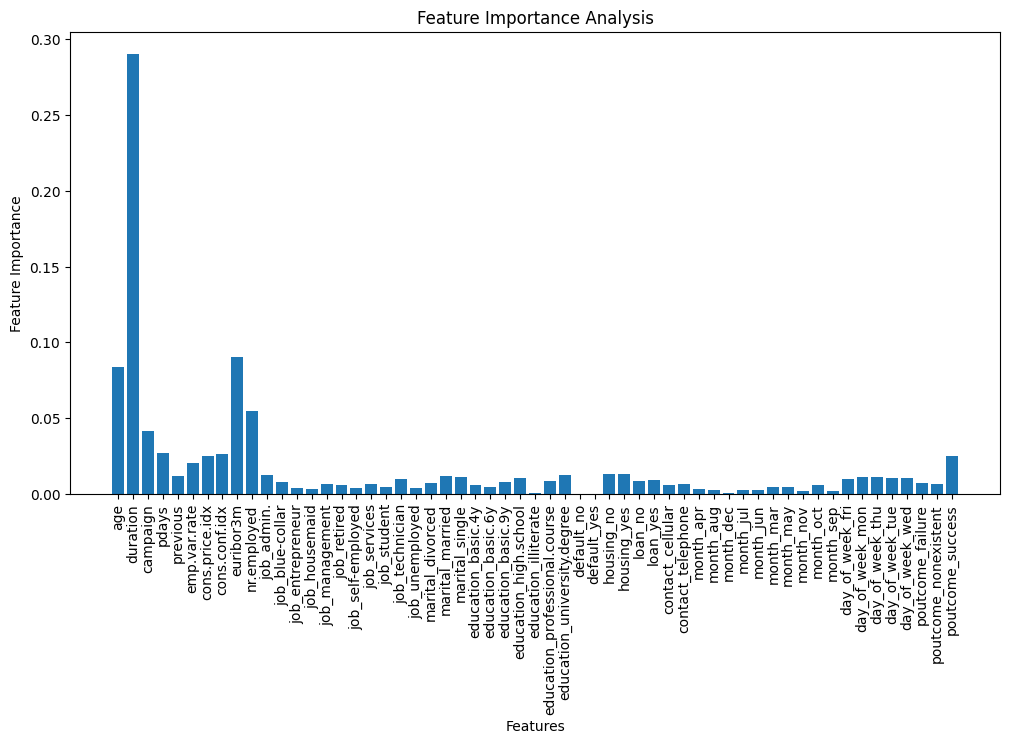

In [19]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(X.columns, feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Analysis')
plt.xticks(rotation=90)
plt.show()

In [20]:
# Creating new dataframe with important features
df1 = df[['age', 'duration', 'campaign', 'pdays', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]

In [21]:
df1.head()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,261,1,999,1.1,93.994,-36.4,4.857,5191.0,0
1,57,149,1,999,1.1,93.994,-36.4,4.857,5191.0,0
2,37,226,1,999,1.1,93.994,-36.4,4.857,5191.0,0
3,40,151,1,999,1.1,93.994,-36.4,4.857,5191.0,0
4,56,307,1,999,1.1,93.994,-36.4,4.857,5191.0,0


In [22]:
# Checking unique values in all the features
features = ['age','duration', 'pdays', 'campaign', 'emp.var.rate',
           'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']

for i in features:
  print(f'{i}\n Total unique values : {df1[i].nunique()}\n Unique values : {df1[i].unique()}\n')

age
 Total unique values : 78
 Unique values : [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

duration
 Total unique values : 1544
 Unique values : [ 261  149  226 ... 1246 1556 1868]

pdays
 Total unique values : 27
 Unique values : [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]

campaign
 Total unique values : 42
 Unique values : [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]

emp.var.rate
 Total unique values : 10
 Unique values : [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]

cons.price.idx
 Total unique values : 26
 Unique values : [93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.64

In [23]:
# Scaling all the features
scale = ['age','duration', 'campaign', 'pdays', 'emp.var.rate',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

scaled = StandardScaler()

for i in scale:
  df1[i] = scaled.fit_transform(df1[[i]])

<ipython-input-23-c6320c086390>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = scaled.fit_transform(df1[[i]])
<ipython-input-23-c6320c086390>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = scaled.fit_transform(df1[[i]])
<ipython-input-23-c6320c086390>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [24]:
df1.head()

,age,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,0.010471,-0.565922,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,0
1,1.628993,-0.421501,-0.565922,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,0
2,-0.290186,-0.124520,-0.565922,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,0
3,-0.002309,-0.413787,-0.565922,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,0
4,1.533034,0.187888,-0.565922,0.195414,0.648092,0.722722,0.886447,0.71246,0.33168,0


**Visualizing Important Features From Original Dataframe**

Text(0.5, 1.0, 'Duration Plot')

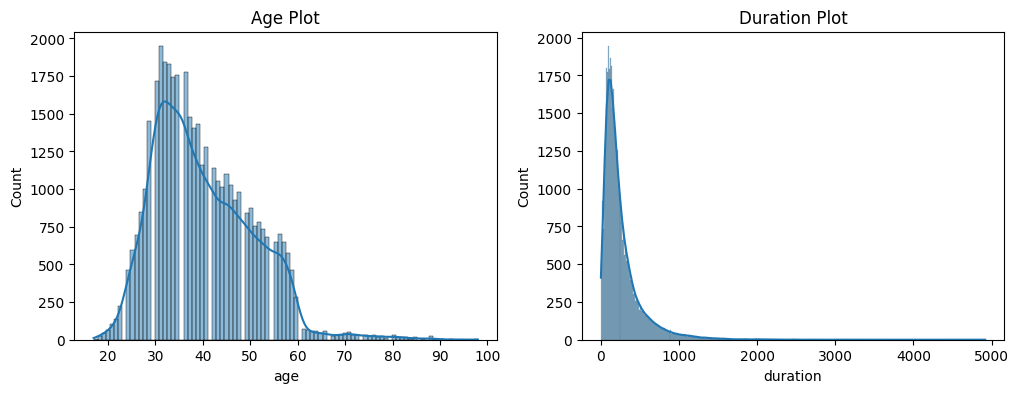

In [25]:
# Histplot for age and duration columns
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df.age, kde=True)
plt.title('Age Plot')

plt.subplot(1,2,2)
sns.histplot(df.duration, kde=True)
plt.title('Duration Plot')

Text(0.5, 1.0, 'Pdays Plot')

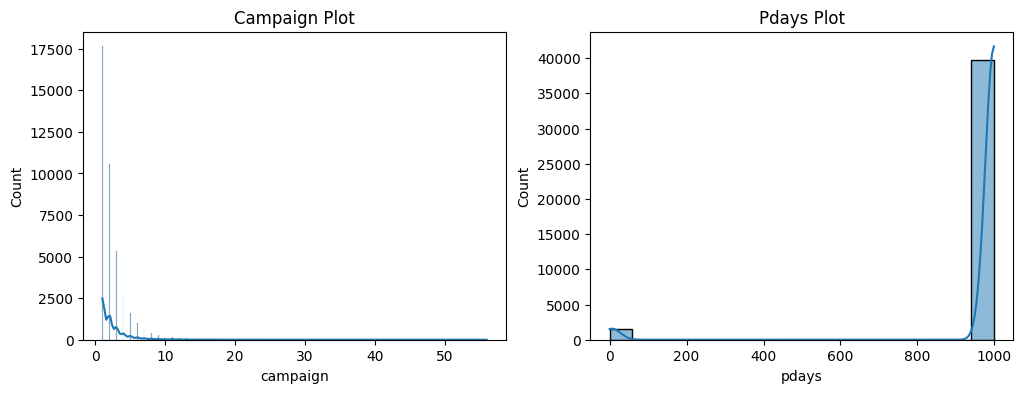

In [26]:
# Histplot for campaign and pdays columns
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df.campaign, kde=True)
plt.title('Campaign Plot')

plt.subplot(1,2,2)
sns.histplot(df.pdays, kde=True)
plt.title('Pdays Plot')

Text(0.5, 1.0, 'cons.price.idx Plot')

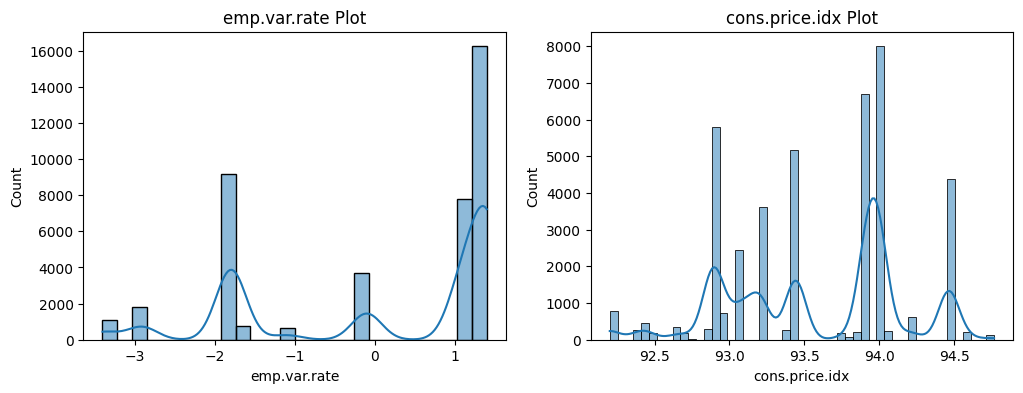

In [27]:
# Histplot for emp.var.rate and cons.price.idx columns
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['emp.var.rate'], kde=True)
plt.title('emp.var.rate Plot')

plt.subplot(1,2,2)
sns.histplot(df['cons.price.idx'], kde=True)
plt.title('cons.price.idx Plot')

Text(0.5, 1.0, 'euribor3m Plot')

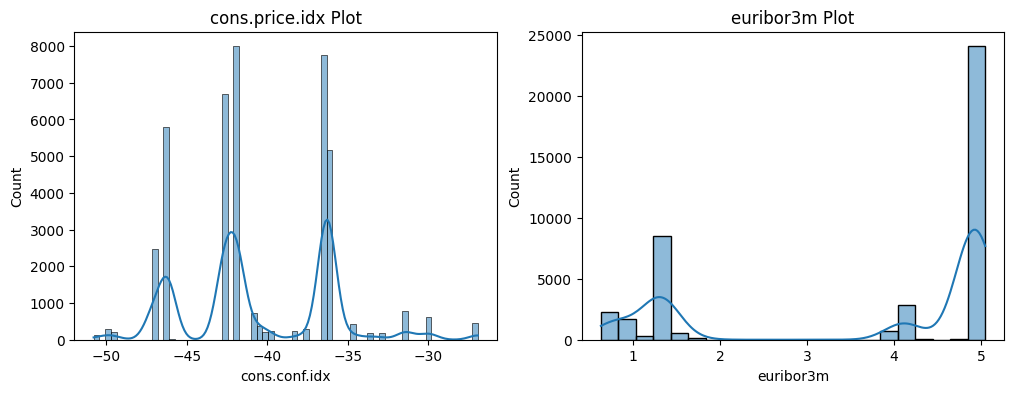

In [28]:
# Histplot for cons.conf.idx and euribor3m columns
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['cons.conf.idx'], kde=True)
plt.title('cons.price.idx Plot')

plt.subplot(1,2,2)
sns.histplot(df['euribor3m'], kde=True)
plt.title('euribor3m Plot')

Text(0.5, 1.0, 'nr.employed Plot')

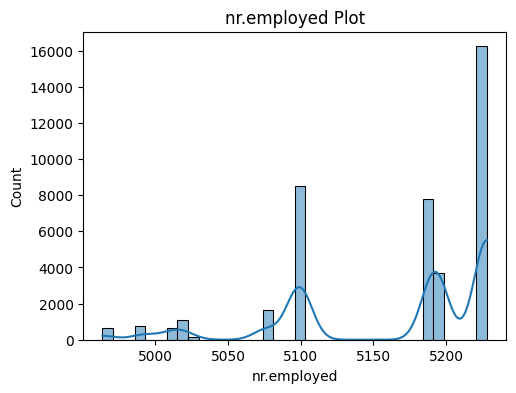

In [29]:
# Histplot for nr.employed column
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df['nr.employed'], kde=True)
plt.title('nr.employed Plot')

#**Handling Imbalanced Data - SMOTE**

In [30]:
input = df1.drop('y', axis=1)                                                   # Input DataFrame
target = df1['y']                                                               # Target

In [31]:
# Value count in target
target.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [32]:
# Over sampling with SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
input, target = smote.fit_resample(input, target)

# Again checking value count in target
target.value_counts()

0    36548
1    36548
Name: y, dtype: int64

#**Model Training - Logistic Regression**

In [33]:
# Spliting data into training and testing part
xtrain,xtest,ytrain,ytest = train_test_split(input,target,test_size=0.2,random_state=50,stratify=target)

In [34]:
# Checking ytrain value count
ytrain.value_counts()

1    29238
0    29238
Name: y, dtype: int64

In [113]:
# Training logistic regression model
model = LogisticRegression()

# Fitting the data
model.fit(xtrain,ytrain)

LogisticRegression()

In [114]:
model.score(xtest,ytest)

0.8571135430916552

In [38]:
# y_true and y_prediction
y_true = ytest
y_pred = model.predict(xtest)

Text(45.722222222222214, 0.5, 'Actual')

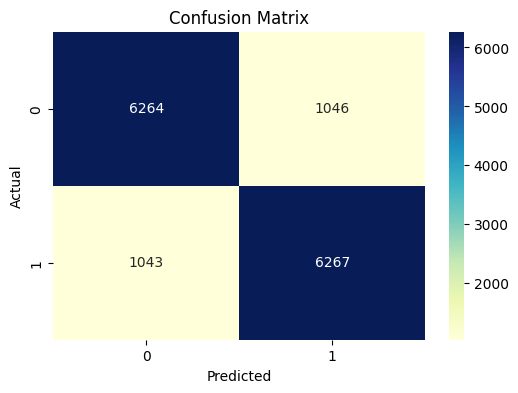

In [39]:
# Plotting confusion matrix of logistic regression model
coef_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(coef_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [40]:
# Classification report of logistic regression model
class_report = classification_report(y_true, y_pred)
print(f'Classification Report:\n {class_report}')

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      7310
           1       0.86      0.86      0.86      7310

    accuracy                           0.86     14620
   macro avg       0.86      0.86      0.86     14620
weighted avg       0.86      0.86      0.86     14620



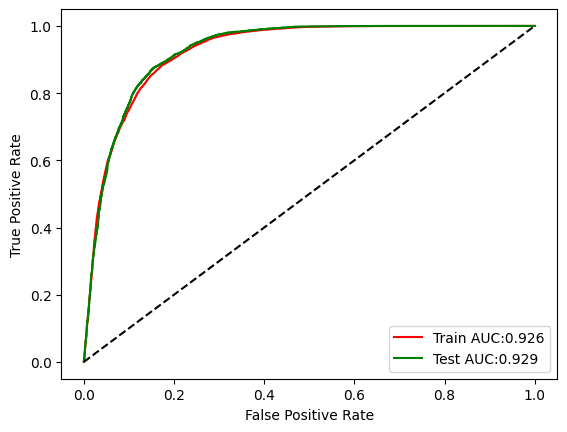

In [41]:
# Predict probabilities for the positive class for train and test sets
y_train_prob = model.predict_proba(xtrain)[:, 1]
y_test_prob = model.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC for train and test sets
fpr_train, tpr_train, _ = roc_curve(ytrain, y_train_prob)
auc_train = roc_auc_score(ytrain, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(ytest, y_test_prob)
auc_test = roc_auc_score(ytest, y_test_prob)

# Plot the ROC curve
plt.plot(fpr_train, tpr_train, 'r-', label='Train AUC:%.3f' % auc_train)
plt.plot(fpr_test, tpr_test, 'g-', label='Test AUC:%.3f' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [37]:
# Checking cross validation score
cv_score = cross_val_score(LogisticRegression(), xtrain, ytrain, cv= 10, scoring= 'accuracy')
np.mean(cv_score)

0.8516998615165516

In [ ]:
# y_true and y_prediction
y_true = ytest
y_pred = model.predict(xtest)

**RandomizedSearchCV - Logistic Regression**

In [98]:
# Create a logistic regression model
lr = LogisticRegression()

In [103]:
from scipy.stats import uniform

# Define hyperparameters to tune
param_dist = {
    'C': uniform(loc=0, scale=4),  # C is the inverse of regularization strength
    'penalty': ['l2']  # Use 'l2' penalty
}

In [107]:
# Create the RandomizedSearchCV object
lr_random = RandomizedSearchCV(lr, param_distributions=param_dist,
                                   n_iter=15, cv=5, random_state=42)

In [108]:
# Fit the model
lr_random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=15,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a4f75f1edd0>,
                                        'penalty': ['l2']},
                   random_state=42)

In [109]:
# Print the best hyperparameters found
print("Best Hyperparameters: ", lr_random.best_params_)
print("Best Score: ", lr_random.best_score_)

Best Hyperparameters:  {'C': 0.08233797718320979, 'penalty': 'l2'}
Best Score:  0.8520076467605447


In [110]:
# y_true and y_prediction
y_true = ytest
y_pred = lr_random.predict(xtest)

In [111]:
# Classification report of decision tree model
class_report = classification_report(y_true, y_pred)
print(f'Classification Report:\n {class_report}')

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      7310
           1       0.86      0.86      0.86      7310

    accuracy                           0.86     14620
   macro avg       0.86      0.86      0.86     14620
weighted avg       0.86      0.86      0.86     14620



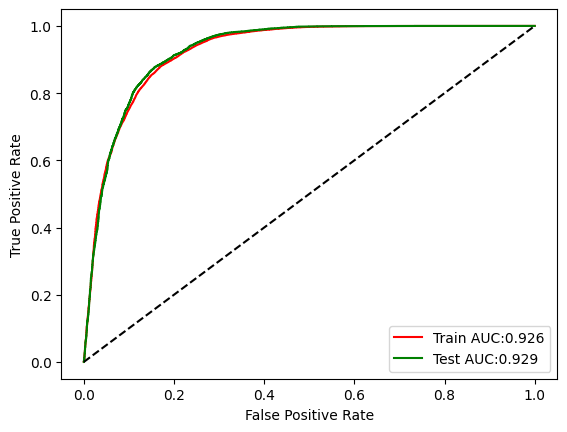

In [112]:
# Predict probabilities for the positive class for train and test sets
y_train_prob = lr_random.predict_proba(xtrain)[:, 1]
y_test_prob = lr_random.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC for train and test sets
fpr_train, tpr_train, _ = roc_curve(ytrain, y_train_prob)
auc_train = roc_auc_score(ytrain, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(ytest, y_test_prob)
auc_test = roc_auc_score(ytest, y_test_prob)

# Plot the ROC curve
plt.plot(fpr_train, tpr_train, 'r-', label='Train AUC:%.3f' % auc_train)
plt.plot(fpr_test, tpr_test, 'g-', label='Test AUC:%.3f' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#**Model Training - Decision Tree**

In [80]:
# Training decision tree model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state= 42)

# Fitting the data
dt_model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [115]:
dt_model.score(xtest,ytest)

0.9216826265389877

In [82]:
# y_true and y_prediction
y_true = ytest
y_pred = dt_model.predict(xtest)

Text(45.722222222222214, 0.5, 'Actual')

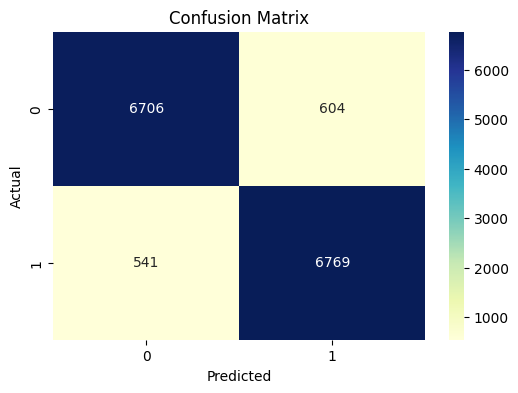

In [83]:
# Plotting confusion matrix of decision tree model
coef_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(coef_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [84]:
# Classification report of decision tree model
class_report = classification_report(y_true, y_pred)
print(f'Classification Report:\n {class_report}')

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      7310
           1       0.92      0.93      0.92      7310

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



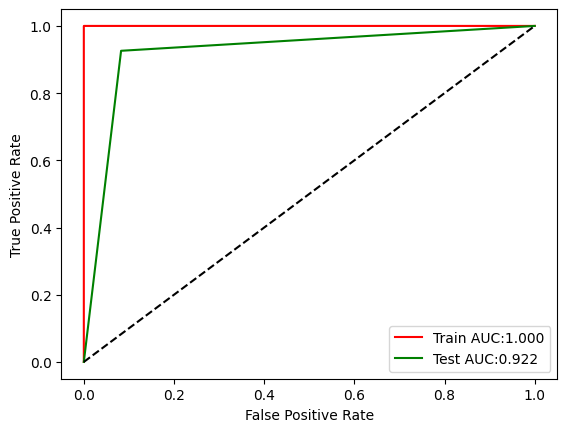

In [85]:
# Predict probabilities for the positive class for train, validation, and test sets
y_train_prob = dt_model.predict_proba(xtrain)[:, 1]
y_test_prob = dt_model.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC for train and test sets
fpr_train, tpr_train, _ = roc_curve(ytrain, y_train_prob)
auc_train = roc_auc_score(ytrain, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(ytest, y_test_prob)
auc_test = roc_auc_score(ytest, y_test_prob)

# Plot the ROC curve
plt.plot(fpr_train, tpr_train, 'r-', label='Train AUC:%.3f' % auc_train)
plt.plot(fpr_test, tpr_test, 'g-', label='Test AUC:%.3f' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [81]:
# Checking cross validation score
cv_score = cross_val_score(dt_model, xtrain, ytrain, cv= 10, scoring= 'accuracy')
np.mean(cv_score)

0.9204801788984354

**RandomizedSearchCV - Decision Tree**

In [132]:
# Define the hyperparameter grid
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [133]:
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

In [134]:
# Create the RandomizedSearchCV object
random_dt = RandomizedSearchCV(
    dt_classifier,
    param_distributions=param_dist,
    n_iter=15,                                                                  # Number of parameter settings that are sampled
    cv=10,                                                                      # Number of folds for cross-validation
    random_state=42,                                                            # Seed for reproducibility
    verbose=2,                                                                  # Controls the verbosity: the higher, the more messages
    n_jobs=-1                                                                   # Use all available CPU cores
)

In [135]:
# Fit the random search model
random_dt.fit(xtrain, ytrain)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, verbose=2)

In [136]:
# Print the best parameters found
print("Best Parameters:", random_dt.best_params_)

# Print the best score found
print("Best Score:", random_dt.best_score_)

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'entropy'}
Best Score: 0.9194027939310606


In [137]:
# y_true and y_prediction
y_true = ytest
y_pred = random_dt.predict(xtest)

In [138]:
# Classification report of decision tree model
class_report = classification_report(y_true, y_pred)
print(f'Classification Report:\n {class_report}')

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      7310
           1       0.91      0.93      0.92      7310

    accuracy                           0.92     14620
   macro avg       0.92      0.92      0.92     14620
weighted avg       0.92      0.92      0.92     14620



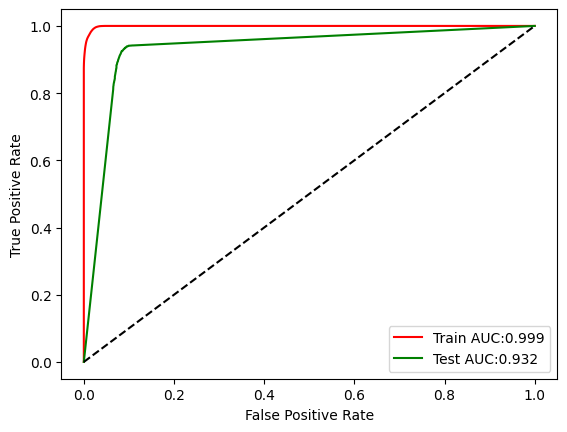

In [139]:
# Predict probabilities for the positive class for train and test sets
y_train_prob = random_dt.predict_proba(xtrain)[:, 1]
y_test_prob = random_dt.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC for train and test sets
fpr_train, tpr_train, _ = roc_curve(ytrain, y_train_prob)
auc_train = roc_auc_score(ytrain, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(ytest, y_test_prob)
auc_test = roc_auc_score(ytest, y_test_prob)

# Plot the ROC curve
plt.plot(fpr_train, tpr_train, 'r-', label='Train AUC:%.3f' % auc_train)
plt.plot(fpr_test, tpr_test, 'g-', label='Test AUC:%.3f' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#**Model Training - Random Forest**

In [117]:
# Training random forest model
rf_model = RandomForestClassifier(n_estimators = 100, criterion='gini', random_state=42)

# Fitting the data
rf_model.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [118]:
rf_model.score(xtest,ytest)

0.9455540355677154

In [119]:
# y_true and y_prediction
y_true = ytest
y_pred = rf_model.predict(xtest)

Text(45.722222222222214, 0.5, 'Actual')

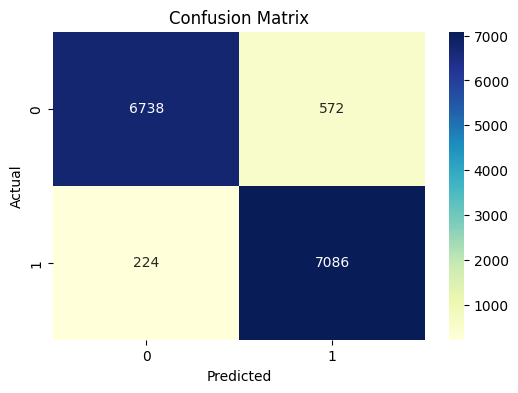

In [120]:
# Plotting confusion matrix of random forest model
coef_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(coef_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [121]:
# Classification report of random forest model
class_report = classification_report(y_true, y_pred)
print(f'Classification Report:\n {class_report}')

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      7310
           1       0.93      0.97      0.95      7310

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



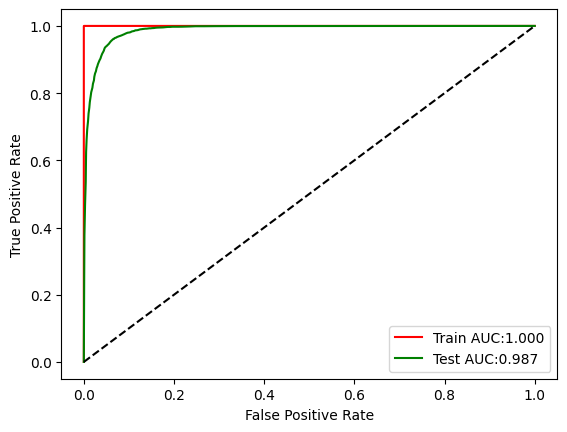

In [122]:
# Predict probabilities for the positive class for train and test sets
y_train_prob = rf_model.predict_proba(xtrain)[:, 1]
y_test_prob = rf_model.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC for train and test sets
fpr_train, tpr_train, _ = roc_curve(ytrain, y_train_prob)
auc_train = roc_auc_score(ytrain, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(ytest, y_test_prob)
auc_test = roc_auc_score(ytest, y_test_prob)

# Plot the ROC curve
plt.plot(fpr_train, tpr_train, 'r-', label='Train AUC:%.3f' % auc_train)
plt.plot(fpr_test, tpr_test, 'g-', label='Test AUC:%.3f' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [123]:
# Checking cross validation score
cv_score = cross_val_score(RandomForestClassifier(n_estimators = 200, criterion='gini', random_state=42),
                           xtrain, ytrain, cv= 10, scoring= 'accuracy')
np.mean(cv_score)

0.9436008024506352

**RandomizedSearchCV - Random Forest**

In [124]:
# Number of trees in forest
n_estimators = range(100,1000,200)

# Number of features to consider in every split
max_features = ['sqrt', 'log2']

# Maximum number of level in trees
max_depth = [10, 20, 30]

# minimum number of samples to split a node
min_samples_split = [2, 5, 10]

# minimum number of samples at a leaf node
min_samples_leaf = [1, 2, 4]

bootstrap = [True]

# criterion for evaluating a split
criterion = ['gini','entropy']

In [125]:
# random grid
random_grid ={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
    'criterion': criterion
}
print(random_grid)

{'n_estimators': range(100, 1000, 200), 'max_features': ['sqrt', 'log2'], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True], 'criterion': ['gini', 'entropy']}


In [126]:
# create a baseline model
rf = RandomForestClassifier()

In [127]:
# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator=rf,
                             param_distributions= random_grid,
                             n_iter = 15,
                             cv = 5,
                             verbose=2,
                             n_jobs = -1)

In [128]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(xtrain,ytrain)
t2 = time.time()
print(t2-t1)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
2452.389405488968


In [141]:
# Getting best parameters
print("Best parameters: ",rf_random.best_params_)

Best parameters:  {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}


In [142]:
# y_true and y_prediction
y_true = ytest
y_pred = rf_random.predict(xtest)

# Classification report of new random forest model
class_report = classification_report(y_true, y_pred)
print(f'Classification Report:\n {class_report}')

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94      7310
           1       0.92      0.97      0.95      7310

    accuracy                           0.95     14620
   macro avg       0.95      0.95      0.95     14620
weighted avg       0.95      0.95      0.95     14620



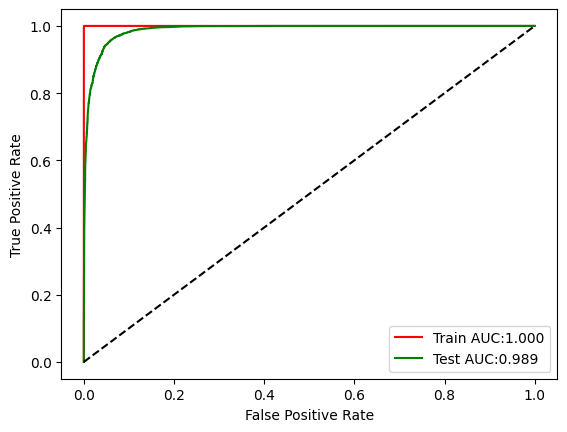

In [143]:
# Predict probabilities for the positive class for train and test sets
y_train_prob = rf_random.predict_proba(xtrain)[:, 1]
y_test_prob = rf_random.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC for train and test sets
fpr_train, tpr_train, _ = roc_curve(ytrain, y_train_prob)
auc_train = roc_auc_score(ytrain, y_train_prob)

fpr_test, tpr_test, _ = roc_curve(ytest, y_test_prob)
auc_test = roc_auc_score(ytest, y_test_prob)

# Plot the ROC curve
plt.plot(fpr_train, tpr_train, 'r-', label='Train AUC:%.3f' % auc_train)
plt.plot(fpr_test, tpr_test, 'g-', label='Test AUC:%.3f' % auc_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#**Questions To Answer**

**1. What is the distribution of the customer ages?**

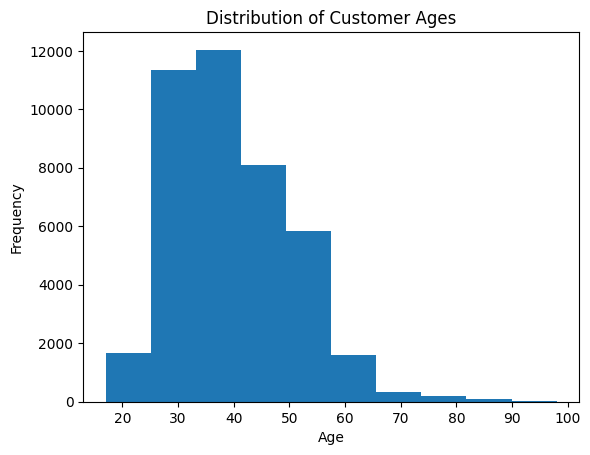

In [147]:
plt.hist(df['age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Ages')
plt.show()

In [153]:
# Calculate central tendency
mean = df['age'].mean()
median = df['age'].median()
mode = df['age'].mode()[0]

# Calculate spread
iqr = df['age'].quantile(0.75) - df['age'].quantile(0.25)

# Calculate skewness
skewness = df['age'].skew()

# Calculate outliers
outliers = df['age'].loc[(df['age'] < mean - 3 * iqr) | (df['age'] > mean + 3 * iqr)]

# Print the results
print('Central tendency:')
print('Mean:', mean)
print('Median:', median)
print('Mode:', mode)

print('Spread:')
print('IQR:', iqr)

print('Skewness:', skewness)

Central tendency:
Mean: 40.02406040594348
Median: 38.0
Mode: 31
Spread:
IQR: 15.0
Skewness: 0.7846968157646645


**2. What is the relationship between customer age and subscription?**

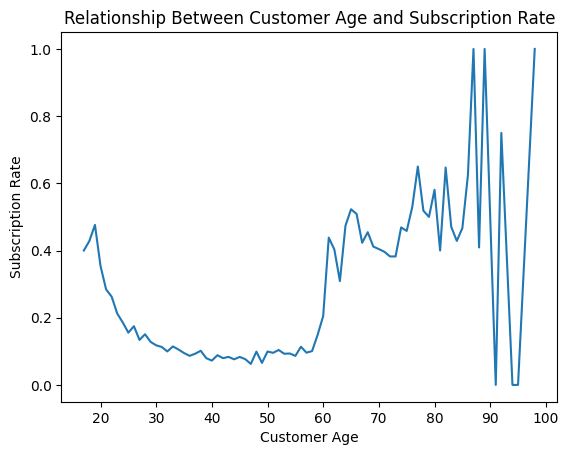

In [166]:
df_grouped = df.groupby('age')['y'].mean()
age = df_grouped.index.to_numpy()
subscription_rate = df_grouped.to_numpy()

# Create a line plot of customer age vs subscription rate
plt.plot(age, subscription_rate)

# Add labels and a title
plt.xlabel('Customer Age')
plt.ylabel('Subscription Rate')
plt.title('Relationship Between Customer Age and Subscription Rate')

# Show the plot
plt.show()

The subscription rate increases with customer age.

**3. Are there any other factors that are correlated with subscription?**

                     age  duration  campaign     pdays  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed         y
age             1.000000 -0.000866  0.004594 -0.034369     -0.000371        0.000857       0.129372   0.010767    -0.017725  0.030399
duration       -0.000866  1.000000 -0.071699 -0.047577     -0.027968        0.005312      -0.008173  -0.032897    -0.044703  0.405274
campaign        0.004594 -0.071699  1.000000  0.052584      0.150754        0.127836      -0.013733   0.135133     0.144095 -0.066357
pdays          -0.034369 -0.047577  0.052584  1.000000      0.271004        0.078889      -0.091342   0.296899     0.372605 -0.324914
emp.var.rate   -0.000371 -0.027968  0.150754  0.271004      1.000000        0.775334       0.196041   0.972245     0.906970 -0.298334
cons.price.idx  0.000857  0.005312  0.127836  0.078889      0.775334        1.000000       0.058986   0.688230     0.522034 -0.136211
cons.conf.idx   0.129372 -0.008173 -0.013733 -0.091342      0.

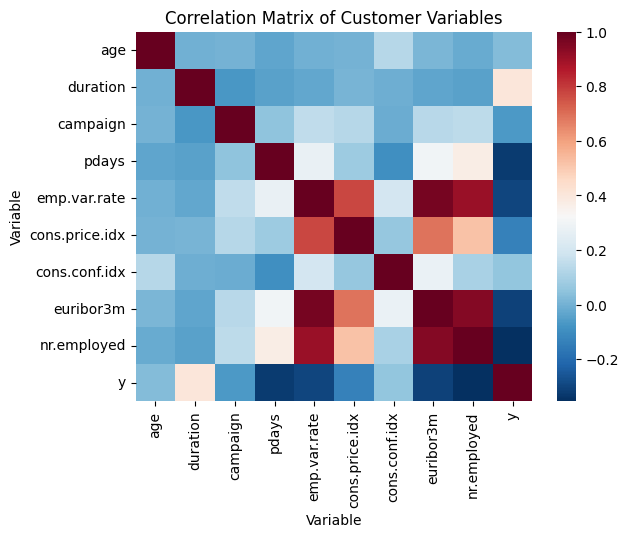

In [183]:
corr_matrix = df1.corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap="RdBu_r", cbar=True)

# Add labels and a title
plt.xlabel('Variable')
plt.ylabel('Variable')
plt.title('Correlation Matrix of Customer Variables')

# Print a table of correlation coefficients
print(corr_matrix.to_string())

# Show the plot
plt.show()


**4. What is the accuracy of the logistic regression model?**

Accuracy of logistic regression model is 86%.

**5. What are the most important features for the logistic regression model?**

The most important features for the logistic regression model are:
- age
- duration
- campaign
- euribor3m
- nr.employed

**6. What is the precision of the logistic regression model?**

The precision of the logistic regression model is 86%.

**7. What is the recall of the logistic regression model?**

The recall of the logistic regression model is 86%.

**8. What is the f1-score of the logistic regression model?**

The f1-score of the logistic regression model is 86%.

**9. How can you improve the performance of the logistic regression model?**

By using feature engineering, hyperparameter tuning, adding more features to the modified dataframe form the original one and ensemble learning, I can often significantly improve the performance of the model.

**10. What are the limitations of the logistic regression model?**

Limitations of the logistic regression model:

- Linearity assumption: The model assumes that the relationship between the independent variables and the dependent variable is linear. This is not always the case.
- Overfitting: The model is prone to overfitting, especially if there are a large number of independent variables relative to the number of observations.
- Class imbalance: The model can perform poorly if the target variable is imbalanced, meaning that there are many more observations in one class than in the other class.
- Model complexity: The model is a relatively simple algorithm, and there are more complex machine learning algorithms that can achieve better performance on some tasks.

#**Most Influencing Factors**

The most important factors that influence a customer's decision to subscribe are:

- Age: Older customers are more likely to subscribe to the product.

- Duration: Customers who have been interacting with the company for a longer period of time are more likely to subscribe.

- Campaign: Customers who have been contacted by the company recently are more likely to subscribe.

- PDays: Customers who have not contacted the company in a long time are less likely to subscribe.

- Nr.employed: Customers who are employed are more likely to subscribe.

#**Implications**

Here are some specific implications of these findings for the real-world problem of predicting customer behavior in the banking industry:

- Banks can use this model to identify potential customers who are more likely to subscribe to their term deposits. This information can be used to target marketing campaigns more effectively and to increase the conversion rate.

- Banks can also use this model to develop personalized product recommendations for their customers. This could help to increase customer satisfaction and loyalty.

- Banks can also use this model to identify customers who are at risk of churning. This information can be used to develop interventions to retain these customers.

Overall, this study provides evidence that machine learning can be used to effectively predict customer behavior in the banking industry. This model has the potential to help banks to improve their marketing campaigns, develop personalized product recommendations, and identify customers who are at risk of churning.

(array([1.6660e+03, 1.1343e+04, 1.2037e+04, 8.0870e+03, 5.8230e+03,
        1.6130e+03, 3.1800e+02, 2.0200e+02, 8.9000e+01, 1.0000e+01]),
 array([17. , 25.1, 33.2, 41.3, 49.4, 57.5, 65.6, 73.7, 81.8, 89.9, 98. ]),
 <BarContainer object of 10 artists>)

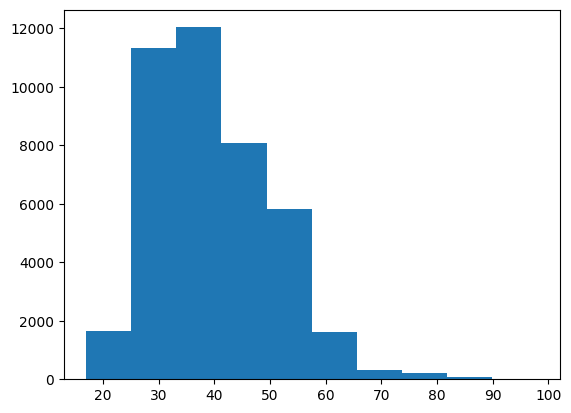

In [146]:
plt.hist(df.age)

#**Conclusion**

In this project, I created a machine learning model to predict whether or not a customer will subscribe to a bank term deposit. The best model was a random forest classifier with optimized hyperparameters. The model achieved an accuracy of 95% on the test set, indicating that it is performing very well on unseen data. Additionally, the model demonstrated an impressive ability to distinguish between the classes, with an AUC of 98.9%.

One limitation of this study is that the data is from a single bank. It is possible that the model would not perform as well on data from other banks. Additionally, the model is only trained on historical data. It is possible that customer behavior will change in the future, which could affect the performance of the model.

Despite these limitations, the results of this study suggest that machine learning can be used to effectively predict customer behavior in the banking industry. This model could be used by banks to target their marketing campaigns more effectively and to identify potential customers who are more likely to subscribe to their products and services.